# **Import**


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import sklearn


# **Loading Dataset**


In [ ]:
# Load the dataset into a DataFrame
data = pd.read_csv(r'adf_fp.csv')

# Display the first few rows of the dataset
print(data.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9721 entries, 0 to 9720
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Timestamp              9721 non-null   object
 1   User                   9721 non-null   object
 2   Action                 9721 non-null   object
 3   File_Involved          7744 non-null   object
 4   Network_IP             7771 non-null   object
 5   Process_Name           9721 non-null   object
 6   Registry_Modified      9721 non-null   int64 
 7   Persistence_Technique  7306 non-null   object
 8   Log_Cleared            9721 non-null   int64 
 9   Timestomped            9721 non-null   int64 
 10  Encoded_Payload        9721 non-null   int64 
 11  Encrypted_Channel      9721 non-null   int64 
 12  Uses_Anti_Forensics    9721 non-null   int64 
dtypes: int64(6), object(7)
memory usage: 987.4+ KB
None


# **Total Records**


In [ ]:
print("Total Records:", len(data))


Total Records: 9721


# **Columns**

In [ ]:
data.columns


Index(['Timestamp', 'User', 'Action', 'File_Involved', 'Network_IP',
       'Process_Name', 'Registry_Modified', 'Persistence_Technique',
       'Log_Cleared', 'Timestomped', 'Encoded_Payload', 'Encrypted_Channel',
       'Uses_Anti_Forensics'],
      dtype='object')

# **Null Values**

In [ ]:

# Check for null values in each column
print(data.isnull().sum())


Timestamp                   0
User                        0
Action                      0
File_Involved            1977
Network_IP               1950
Process_Name                0
Registry_Modified           0
Persistence_Technique    2415
Log_Cleared                 0
Timestomped                 0
Encoded_Payload             0
Encrypted_Channel           0
Uses_Anti_Forensics         0
dtype: int64


# **Target Column -> *Checking Balance***





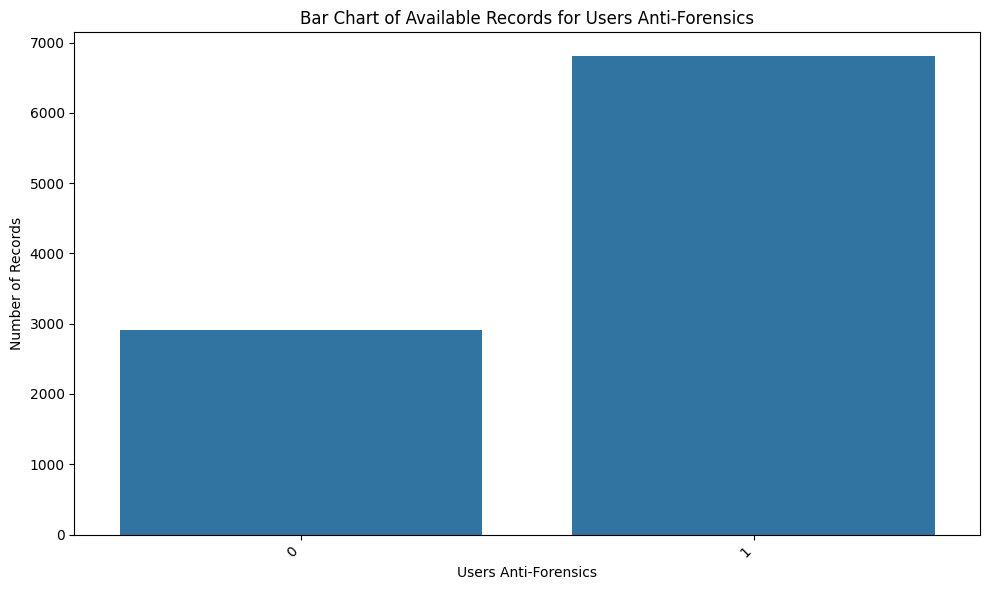

In [ ]:
# Load the dataset into a DataFrame
data = pd.read_csv(r'adf_fp.csv')

# Filter out rows where 'Users_Anti_Forensics' is not NaN
available_users = data.dropna(subset=['Uses_Anti_Forensics'])

# Create a bar chart of the available records for 'Users_Anti_Forensics'
plt.figure(figsize=(10, 6))  # Adjust figure size for better visualization
sns.countplot(x='Uses_Anti_Forensics', data=available_users)

plt.title('Bar Chart of Available Records for Users Anti-Forensics')
plt.xlabel('Users Anti-Forensics')
plt.ylabel('Number of Records')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability
plt.tight_layout()
plt.show()


# **Splitting Dataset**

In [ ]:
# Load the dataset
data = pd.read_csv("adf_fp.csv")

# Total records
total_records = len(data)

# Calculate split sizes
train_size = int(0.7 * total_records)
val_size = int(0.2 * total_records)
test_size = total_records - train_size - val_size

# Print percentages
print(f"\n🔹 Training set: {train_size} ({train_size / total_records * 100:.2f}%)")
print(f"🔹 Validation set: {val_size} ({val_size / total_records * 100:.2f}%)")
print(f"🔹 Test set: {test_size} ({test_size / total_records * 100:.2f}%)")



🔹 Training set: 6804 (69.99%)
🔹 Validation set: 1944 (20.00%)
🔹 Test set: 973 (10.01%)


# **Choosing Features**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Load the dataset (assuming it's already loaded as 'data')
# If not, uncomment the following line and adjust the file path
# data = pd.read_csv('adf_fp.csv')

# Define features (X) and target (y)
features = ['File_Involved', 'Process_Name', 'Registry_Modified',
            'Persistence_Technique', 'Log_Cleared', 'Encoded_Payload',
            'Encrypted_Channel']
target = 'Uses_Anti_Forensics'

# Convert categorical features to numerical using one-hot encoding
X = pd.get_dummies(data[features], drop_first=True)  # drop_first avoids multicollinearity
y = data[target]

# **Running ML Models**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_fscore_support, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier

# Load the dataset
data = pd.read_csv("adf_fp.csv")

# Display dataset info
print("\n📊 Dataset Info:")
print(data.info())

# Total records
total_records = len(data)
print(f"\n📌 Total records: {total_records}")

# Calculate split sizes
train_size = int(0.7 * total_records)
val_size = int(0.2 * total_records)
test_size = total_records - train_size - val_size

# Print percentages
print(f"\n🔹 Training set: {train_size} ({train_size / total_records * 100:.2f}%)")
print(f"🔹 Validation set: {val_size} ({val_size / total_records * 100:.2f}%)")
print(f"🔹 Test set: {test_size} ({test_size / total_records * 100:.2f}%)")

# Split the data
train_data, temp_data = train_test_split(data, train_size=train_size, random_state=42)
val_data, test_data = train_test_split(temp_data, train_size=val_size / (val_size + test_size), random_state=42)

# Combine training + validation
combined_train_data = pd.concat([train_data, val_data])

# Features and target
features = ['File_Involved', 'Process_Name', 'Registry_Modified',
            'Persistence_Technique', 'Log_Cleared', 'Encoded_Payload', 'Encrypted_Channel']
target = 'Uses_Anti_Forensics'

# One-hot encode categorical features
X_train = pd.get_dummies(combined_train_data[features], drop_first=True)
X_test = pd.get_dummies(test_data[features], drop_first=True)

# Align test set with train set
X_test = X_test.reindex(columns=X_train.columns, fill_value=0)

y_train = combined_train_data[target].astype(int)
y_test = test_data[target].astype(int)

# Initialize models
models = {
    "Random Forest": RandomForestClassifier(random_state=42),
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss')
}

# Train and evaluate
print("\n📈 Model Performance Metrics:")
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_pred, average='binary')
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

    print(f"\n🔹 {name}")
    print(f"Precision:        {precision:.4f}")
    print(f"Recall:           {recall:.4f}")
    print(f"F1-Score:         {f1:.4f}")
    print(f"False Positives:  {fp}")




📊 Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9721 entries, 0 to 9720
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Timestamp              9721 non-null   object
 1   User                   9721 non-null   object
 2   Action                 9721 non-null   object
 3   File_Involved          7744 non-null   object
 4   Network_IP             7771 non-null   object
 5   Process_Name           9721 non-null   object
 6   Registry_Modified      9721 non-null   int64 
 7   Persistence_Technique  7306 non-null   object
 8   Log_Cleared            9721 non-null   int64 
 9   Timestomped            9721 non-null   int64 
 10  Encoded_Payload        9721 non-null   int64 
 11  Encrypted_Channel      9721 non-null   int64 
 12  Uses_Anti_Forensics    9721 non-null   int64 
dtypes: int64(6), object(7)
memory usage: 987.4+ KB
None

📌 Total records: 9721

🔹 Training set: 6804 (69.99%)


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [16:41:02] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
